In [78]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

#import tensorflow libraries 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from sklearn.decomposition import PCA

from keras.models import Sequential

In [79]:
df = pd.read_csv("data/cleaned_data1.csv")

In [80]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [81]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)


ANN


Define model

In [85]:
n_features = train_features_pca.shape[1]
n_features

20

In [86]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
n_epochs = 100
learning_rate = 0.0001
decay_rate = learning_rate / n_epochs

In [88]:
sgd = SGD(lr=learning_rate, momentum=0.8, decay=decay_rate, nesterov=False)

#Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

#fit the model
history1 = model.fit(train_features, train_target, epochs=n_epochs, batch_size=32,validation_data=(test_features,test_target), verbose=0)

In [89]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

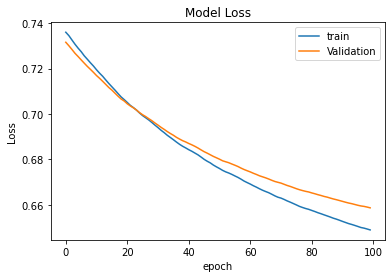

In [90]:
plt.plot(history1.history['loss'],label='Training Loss')
plt.plot(history1.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

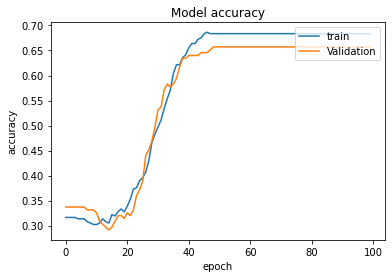

In [91]:
plt.plot(history1.history['accuracy'],label='Training accuracy')
plt.plot(history1.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

Evaluate the model

In [92]:
loss, acc = model.evaluate(test_features, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 65.714


Confusion matrix

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[115,   0],
       [ 60,   0]], dtype=int64)

In [94]:
print('ANN: \n', classification_report(test_target, data),'\n')

ANN: 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       115
           1       0.00      0.00      0.00        60

    accuracy                           0.66       175
   macro avg       0.33      0.50      0.40       175
weighted avg       0.43      0.66      0.52       175
 



C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RMSProp (Root Mean Square Propagation)

In [95]:
df = pd.read_csv("data/cleaned_data1.csv")
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [96]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [97]:
sc=StandardScaler()

scaler = sc.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

PCA

In [98]:
# see explained variance ratios
pca = PCA()
pca.fit(train_features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[:20].sum()

0.8288003091939123

define PCA with 27 components

In [99]:
pca = PCA(n_components = 20)
pca.fit(train_features)
train_features_pca = pca.transform(train_features)
test_features_pca = pca.transform(test_features)

ANN

In [100]:
n_features = train_features_pca.shape[1]
n_features

20

In [101]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
n_epochs=100
decay_rate = learning_rate / n_epochs
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001,momentum=0.8,decay=decay_rate)

#Compile the model
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

#fit the model
history2 = model.fit(train_features_pca, train_target, epochs=n_epochs,validation_data=(test_features_pca,test_target), batch_size=32, verbose=0)

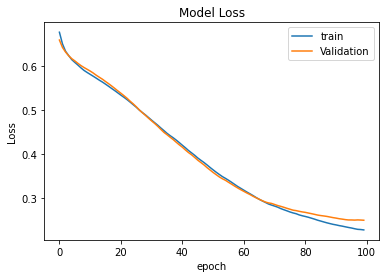

In [103]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

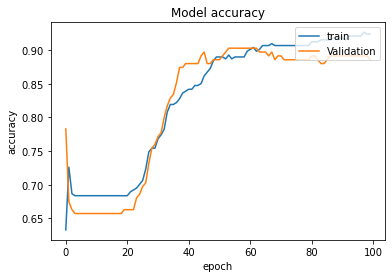

In [104]:
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

Evaluate the model

In [105]:
loss, acc = model.evaluate(test_features_pca, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 88.571


Confusion matrix

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features_pca)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[102,  13],
       [  7,  53]], dtype=int64)

In [107]:
print('ANN: \n', classification_report(test_target, data),'\n')

ANN: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       115
           1       0.80      0.88      0.84        60

    accuracy                           0.89       175
   macro avg       0.87      0.89      0.88       175
weighted avg       0.89      0.89      0.89       175
 



# Adam

In [108]:
df = pd.read_csv("data/cleaned_data1.csv")
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [109]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [110]:
# see explained variance ratios
pca = PCA()
pca.fit(train_features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[:10].sum()

0.9200831829387612

PCA

In [111]:
pca = PCA(n_components = 10)
pca.fit(train_features)
train_features_pca = pca.transform(train_features)
test_features_pca = pca.transform(test_features)

In [112]:
n_features = train_features_pca.shape[1]
n_features

10

ANN

In [113]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
n_epochs=100
adam = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=decay_rate )

#Compile the model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

#fit the model
history3 = model.fit(train_features_pca, train_target,validation_data=(test_features_pca,test_target), epochs=n_epochs, batch_size=32, verbose=0)

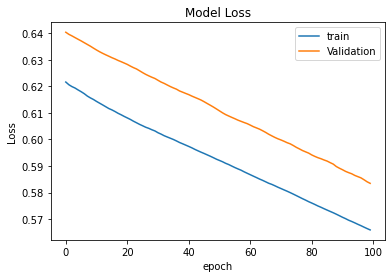

In [115]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

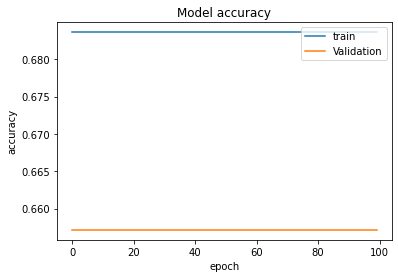

In [116]:
plt.plot(history3.history['accuracy'],label='Training accuracy')
plt.plot(history3.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

Evaluate the model

In [117]:
loss, acc = model.evaluate(test_features_pca, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 65.714


Confusion matrix

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features_pca)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[115,   0],
       [ 60,   0]], dtype=int64)

In [119]:
print('ANN : \n', classification_report(test_target, data),'\n')

ANN : 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       115
           1       0.00      0.00      0.00        60

    accuracy                           0.66       175
   macro avg       0.33      0.50      0.40       175
weighted avg       0.43      0.66      0.52       175
 



C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adadelta Optimizer

In [120]:
df = pd.read_csv("data/cleaned_data1.csv")
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [121]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [122]:
sc=StandardScaler()

scaler = sc.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [123]:
# see explained variance ratios
pca = PCA()
pca.fit(train_features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[:10].sum()

0.5607738053308722

PCA

In [124]:
pca = PCA(n_components = 10)
pca.fit(train_features)
train_features_pca = pca.transform(train_features)
test_features_pca = pca.transform(test_features)

In [125]:
n_features = train_features_pca.shape[1]
n_features

10

ANN

In [126]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
n_epochs=100
adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.0001,decay=decay_rate)

#Compile the model
model.compile(optimizer=adadelta, loss='binary_crossentropy', metrics=['accuracy'])

#fit the model
history4 = model.fit(train_features_pca, train_target, epochs=n_epochs,validation_data=(test_features_pca,test_target), batch_size=32, verbose=0)

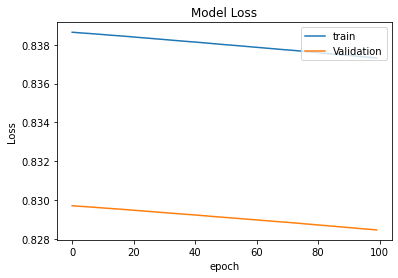

In [128]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

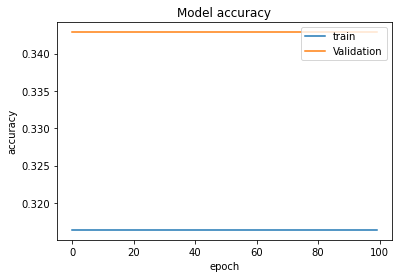

In [129]:
plt.plot(history4.history['accuracy'],label='Training accuracy')
plt.plot(history4.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

Evaluate the model

In [130]:
loss, acc = model.evaluate(test_features_pca, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 34.286


Confusion matrix

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features_pca)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[  0, 115],
       [  0,  60]], dtype=int64)

In [132]:
print('ANN : \n', classification_report(test_target, data),'\n')

ANN : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.34      1.00      0.51        60

    accuracy                           0.34       175
   macro avg       0.17      0.50      0.26       175
weighted avg       0.12      0.34      0.18       175
 



C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adagrad Optimizer

In [133]:
df = pd.read_csv("data/cleaned_data1.csv")
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28.0,44.6,152.0,19.300000,15,77.0,22,13.5,2,5.0,...,0,1.0,0,110.0,80.0,3.0,3,18.0,18.0,8.5
1,36.0,65.0,161.5,24.921163,15,74.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,3.0,5,15.0,14.0,3.7
2,33.0,68.8,165.0,25.270891,11,72.0,18,13.5,2,5.0,...,1,1.0,0,120.0,80.0,13.0,15,18.0,20.0,10.0
3,37.0,65.0,148.0,29.674945,13,72.0,20,13.5,2,5.0,...,0,0.0,0,120.0,70.0,2.0,2,15.0,14.0,7.5
4,25.0,52.0,161.0,20.060954,11,72.0,18,13.5,2,5.0,...,0,0.0,0,120.0,80.0,3.0,4,16.0,14.0,7.0


In [134]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [135]:
# see explained variance ratios
pca = PCA()
pca.fit(train_features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[:10].sum()

0.9200831829387612

PCA

In [136]:
pca = PCA(n_components = 10)
pca.fit(train_features)
train_features_pca = pca.transform(train_features)
test_features_pca = pca.transform(test_features)

In [137]:
n_features = train_features_pca.shape[1]
n_features

10

ANN

In [138]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [139]:
n_epochs=100
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.0001, decay=decay_rate )

#Compile the model
model.compile(optimizer=adagrad, loss='binary_crossentropy', metrics=['accuracy'])

#fit the model
history5 = model.fit(train_features_pca, train_target, epochs=n_epochs,validation_data=(test_features_pca,test_target), batch_size=32, verbose=0)

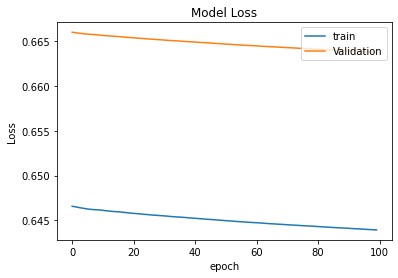

In [140]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

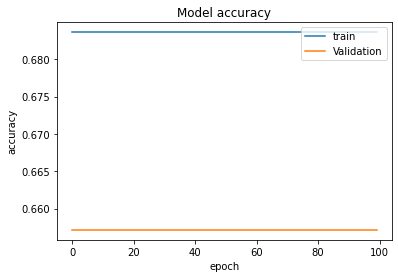

In [141]:
plt.plot(history5.history['accuracy'],label='Training accuracy')
plt.plot(history5.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

Evaluate the model

In [142]:
loss, acc = model.evaluate(test_features_pca, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 65.714


Confusion matrix

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features_pca)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[115,   0],
       [ 60,   0]], dtype=int64)

In [144]:
print('ANN : \n', classification_report(test_target, data),'\n')

ANN : 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       115
           1       0.00      0.00      0.00        60

    accuracy                           0.66       175
   macro avg       0.33      0.50      0.40       175
weighted avg       0.43      0.66      0.52       175
 



C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
